## import libraries and dataset

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("FuelConsumption.csv")
features = df.iloc[ : ,4 :5]
target = df.iloc[ : , -1  ]
target = pd.DataFrame(target)
features

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


## data cleaning

In [67]:
print(features.isnull().sum())
print ("the min of engine size is  : " , features.min())
print("the max of engine size is : " , features.max())
print("the min of target is : " , target.min() )
print("the max of target is : " , target.max())

ENGINESIZE    0
dtype: int64
the min of engine size is  :  ENGINESIZE    1.0
dtype: float64
the max of engine size is :  ENGINESIZE    8.4
dtype: float64
the min of target is :  CO2EMISSIONS    108
dtype: int64
the max of target is :  CO2EMISSIONS    488
dtype: int64


## Train - Test split

In [68]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(features , target, shuffle=True , train_size=0.8, random_state=4)

## standardization

In [69]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
x_train = ssc.fit_transform(x_train)
x_test = ssc.fit_transform(x_test)
y_train = ssc.fit_transform(y_train)
y_test = ssc.fit_transform(y_test)

## linear regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_regressor = LinearRegression()
linear_regressor.fit(x_test ,y_test)
linear_y_pred =linear_regressor.predict(x_test)
print("the leinear r2 is  : " ,r2_score(y_test , linear_y_pred))


the leinear r2 is  :  0.8151683059651582


## plotting

Text(0, 0.5, 'Emission')

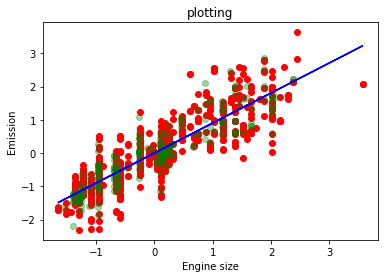

In [71]:
plt.scatter(x_train , y_train , c = 'r' )
plt.scatter(x_test , y_test , c="g" , alpha=0.35 ) # alfha is opacity or transparency
plt.plot(x_train , linear_regressor.predict(x_train), c = 'b')
plt.title("plotting")
plt.xlabel("Engine size")
plt.ylabel("Emission")

## polynomial regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
poly_regressor = LinearRegression()
poly_regressor.fit(poly_x_train , y_train)
poly_y_pred = poly_regressor.predict(poly_x_test)

## plotting

Text(0, 0.5, 'Emission')

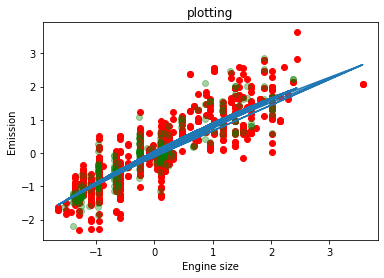

In [75]:

plt.scatter(x_train , y_train , c = 'r' )
plt.scatter(x_test , y_test , c="g" , alpha=0.35 ) # alfha is opacity or transparency
plt.plot(x_train , poly_regressor.predict(poly_x_train))
plt.title("plotting")
plt.xlabel("Engine size")
plt.ylabel("Emission")

Author : Saleh Mhosseini